# Mask R-CNN - Inspect Hydride Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [7]:
import os
import sys
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import io
from skimage import draw, io, color
import warnings
warnings.filterwarnings('ignore')

# Set root directory and path to trained model
ROOT_DIR = os.path.abspath("C:\\Users\\julia\\Downloads\\mask_rcnn_annotation_tool")
MODEL_DIR = os.path.join(ROOT_DIR, "mrcnn", "trained_models")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
import model as modellib
from save import display_instances
import hydride_train as hydride_200x

## Configurations

In [8]:
config = hydride_200x.HydrideConfig()
Hydride_DIR = os.path.join(ROOT_DIR, "data")
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE=0.99
    IMAGE_MAX_DIM=1280
    NUM_CLASSES= 1 + 3 # Background + 2 flavours of hydride, and grain boundaries

config = InferenceConfig()
config.display()

dataset = hydride_200x.HydrideDataset()
class_names = ['Circumferential Hydride', 'Radial Hydride', 'Grain Boundary']


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        70
DETECTION_MIN_CONFIDENCE       0.99
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1280
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

## Notebook Preferences

In [9]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [10]:
# Create model in inference mode
warnings.filterwarnings('ignore')
os.chdir(ROOT_DIR)
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
weights_path = "mrcnn/trained_models/Irr_hydrides.h5" 

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights  mrcnn/trained_models/Irr_hydrides.h5


## Run Detection

hydride-sample.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


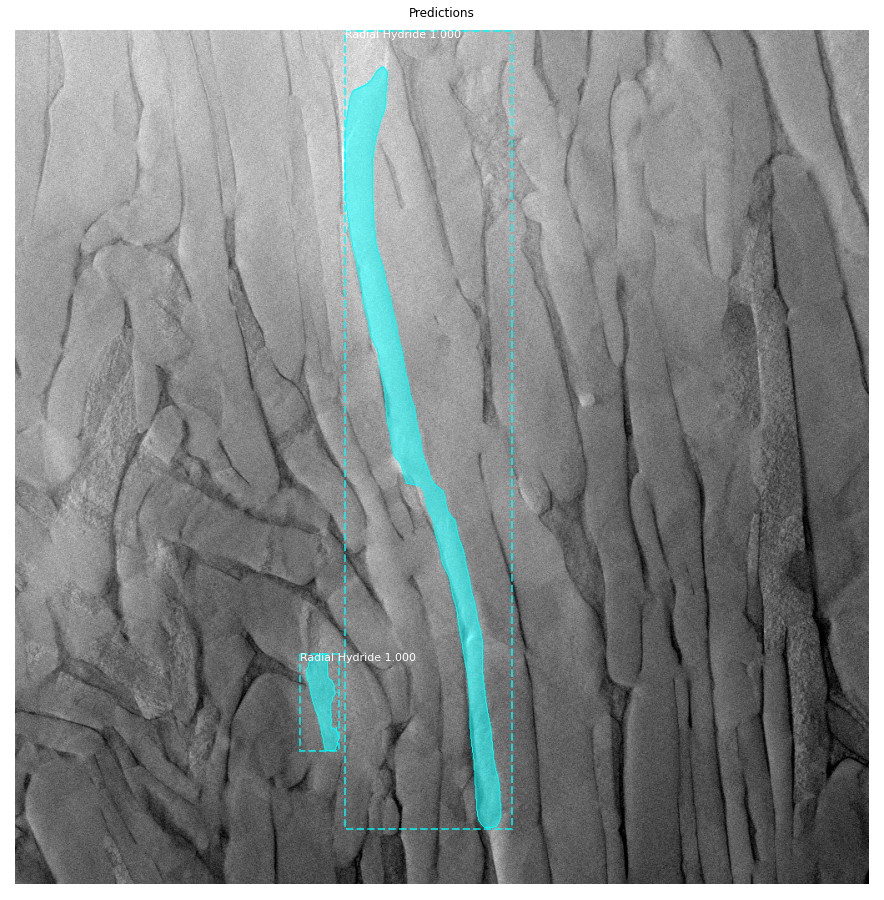

In [11]:
# Read all images in a folder
os.chdir(ROOT_DIR)
subdatasetfilename = 'samples/'

save_address = 'results/' 

for filename in os.listdir(ROOT_DIR + '/data/'+subdatasetfilename):
    if filename.endswith('.jpg'): 
        print(filename)
      
        image = io.imread("data/" + subdatasetfilename + filename)

    try:
            results = model.detect([image], verbose=1)
            ax = get_ax(1)  
            r = results[0]
            display_instances(filename, save_address, image, r['rois'], r['masks'], r['class_ids'], 
                            class_names,r['scores'], ax=ax,
                            title="Predictions") 
            
    except Exception as e:
        print("error") 
        print(e) 
        pass
        
        